In [36]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor

In [37]:
ppg_data = pd.read_csv('/media/work/icarovasconcelos/mono/authors-ppg7-6.csv')
ppg_data.head()

,ano_calendario,ppg_codigo,ppg_nome,ppg_nota,institution_id,ies_sigla,nome_docente,doutorado_ano,regime_trabalho,carga_horaria,link_do_lattes,author_id,bolsista_produtividade,extrato_bolsa_produtividade,doutorado_institution_id,doutorado_institution_name,doutorado_ppg_codigo,doutorado_supervisor_id,doutorado_supervisor_name
0,2022,42005019016P8,CC,7,I45643870,PUC/RS,TIAGO COELHO FERRETO,2010,Integral,40,http://lattes.cnpq.br/8685431534934812,A5009859711,VERDADEIRO,DT2,I45643870,Pontifícia Universidade Católica do Rio Grande...,31005012004P9,A5071130875,César Augusto Fonticielha De Rose
1,2022,42005019016P8,CC,7,I45643870,PUC/RS,SORAIA RAUPP MUSSE,2000,Integral,40,http://lattes.cnpq.br/2302314954133011,A5059434669,VERDADEIRO,PQ1C,I5124864,École polytechnique fédérale de Lausanne,NaN,A5005709068,Dr Daniel Thalmann
2,2022,42005019016P8,CC,7,I45643870,PUC/RS,SABRINA DOS SANTOS MARCZAK,2011,Integral,40,http://lattes.cnpq.br/9458496222461501,A5014651524,VERDADEIRO,PQ2,I212119943,University of Victoria,NaN,A5007049054,Daniela Damian
3,2022,42005019016P8,CC,7,I45643870,PUC/RS,RODRIGO COELHO BARROS,2013,Integral,20,http://lattes.cnpq.br/8172124241767828,A5039629929,VERDADEIRO,PQ2,I17974374,Universidade de São Paulo,33002045004P1,A5079499583,André Carlos Ponce de Leon Ferreira de Carvalho
4,2022,42005019016P8,CC,7,I45643870,PUC/RS,RAFAEL PRIKLADNICKI,2009,Integral,40,http://lattes.cnpq.br/2007065934836962,A5024645888,VERDADEIRO,PQ1D,I45643870,Pontifícia Universidade Católica do Rio Grande...,31005012004P9,A5022404709,Jorge Luis Nicolas Audy


In [38]:
ppg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ano_calendario               504 non-null    int64 
 1   ppg_codigo                   504 non-null    object
 2   ppg_nome                     504 non-null    object
 3   ppg_nota                     504 non-null    int64 
 4   institution_id               504 non-null    object
 5   ies_sigla                    504 non-null    object
 6   nome_docente                 504 non-null    object
 7   doutorado_ano                504 non-null    int64 
 8   regime_trabalho              504 non-null    object
 9   carga_horaria                504 non-null    int64 
 10  link_do_lattes               504 non-null    object
 11  author_id                    498 non-null    object
 12  bolsista_produtividade       504 non-null    object
 13  extrato_bolsa_produtividade  277 no

In [39]:
ppg_data = ppg_data.dropna(subset=['author_id'])
ppg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ano_calendario               498 non-null    int64 
 1   ppg_codigo                   498 non-null    object
 2   ppg_nome                     498 non-null    object
 3   ppg_nota                     498 non-null    int64 
 4   institution_id               498 non-null    object
 5   ies_sigla                    498 non-null    object
 6   nome_docente                 498 non-null    object
 7   doutorado_ano                498 non-null    int64 
 8   regime_trabalho              498 non-null    object
 9   carga_horaria                498 non-null    int64 
 10  link_do_lattes               498 non-null    object
 11  author_id                    498 non-null    object
 12  bolsista_produtividade       498 non-null    object
 13  extrato_bolsa_produtividade  276 non-nul

In [40]:
ppg_data = ppg_data.fillna("null")
ppg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ano_calendario               498 non-null    int64 
 1   ppg_codigo                   498 non-null    object
 2   ppg_nome                     498 non-null    object
 3   ppg_nota                     498 non-null    int64 
 4   institution_id               498 non-null    object
 5   ies_sigla                    498 non-null    object
 6   nome_docente                 498 non-null    object
 7   doutorado_ano                498 non-null    int64 
 8   regime_trabalho              498 non-null    object
 9   carga_horaria                498 non-null    int64 
 10  link_do_lattes               498 non-null    object
 11  author_id                    498 non-null    object
 12  bolsista_produtividade       498 non-null    object
 13  extrato_bolsa_produtividade  498 non-nul

In [46]:
ppg_data = ppg_data.drop_duplicates(subset=['author_id'])
ppg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 503
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ano_calendario               491 non-null    int64 
 1   ppg_codigo                   491 non-null    object
 2   ppg_nome                     491 non-null    object
 3   ppg_nota                     491 non-null    int64 
 4   institution_id               491 non-null    object
 5   ies_sigla                    491 non-null    object
 6   nome_docente                 491 non-null    object
 7   doutorado_ano                491 non-null    int64 
 8   regime_trabalho              491 non-null    object
 9   carga_horaria                491 non-null    int64 
 10  link_do_lattes               491 non-null    object
 11  author_id                    491 non-null    object
 12  bolsista_produtividade       491 non-null    object
 13  extrato_bolsa_produtividade  491 non-nul

In [41]:
dicts = ppg_data.to_dict(orient='records')

G = nx.Graph()

for d in dicts:
    G.add_node(d['author_id'], label=d['nome_docente'], **d)

In [42]:
import json

# Specify the path to your JSON file
json_file_path = '/media/work/icarovasconcelos/mono/7&6ppg_works_and_authors_since_2004.json'

# Load the JSON file
with open(json_file_path, 'r') as f:
    data = json.load(f)



In [43]:
from itertools import combinations

# Connect authors by work
for work_id, authors in data.items():
    for author1, author2 in combinations(authors, 2):
        if 'author_id' in author1 and 'author_id' in author2:
            if G.has_node(author1['author_id']) and G.has_node(author2['author_id']):
                if G.has_edge(author1['author_id'], author2['author_id']):
                    # If the edge already exists, increment its weight by 1
                    G[author1['author_id']][author2['author_id']]['weight'] += 1
                else:
                    # If the edge does not exist, add it with a weight of 1
                    G.add_edge(author1['author_id'], author2['author_id'], weight=1)
                    
print("Number of nodes:", G.number_of_nodes())

# Print the number of edges
print("Number of edges:", G.number_of_edges())


Number of nodes: 491
Number of edges: 2335


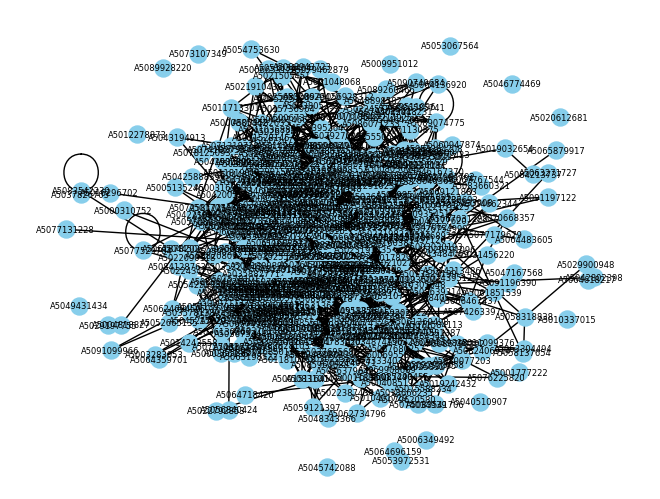

In [45]:
import matplotlib.pyplot as plt


# Draw the graph using the calculated positions
nx.draw(G, with_labels=True, node_color='skyblue', node_size=150, edge_cmap=plt.cm.Blues, pos=nx.spring_layout(G, k=0.35), font_size=6)

# Show the plot
plt.show()

In [ ]:
nx.write_graphml(G, "ppg_graph.graphml")